### Visualizing Data in Python
#### Tables, Histograms, Boxplots, and Slicing for Statistics

When working with a new dataset, one of the most useful things to do is to begin to visualize the data. By using tables, histograms, box plots, and other visual tools, we can get a better idea of what the data may be trying to tell us, and we can gain insights into the data that we may have not discovered otherwise.

Today, we will be going over how to perform some basic visualisations in Python, and, most importantly, we will learn how to begin exploring data from a graphical perspective.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

#load in the data set. In this particular case I'm using a standard dataset provided by the seaborn library
tips_data = sns.load_dataset("tips")
print(tips_data.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


#### Describing data

Summary statistics helps to get an overall understanding of your dataset.

In [12]:
tips_data.describe() # it selects columns of numerical variables only

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


- The function above gives a general ideal of the dataset. For example, we can roughly see the type of distribution of each one of the numerical variables by looking at the quartiles, median and standard deviation.

#### Histograms - quick way to visualize how your dataset is distributed

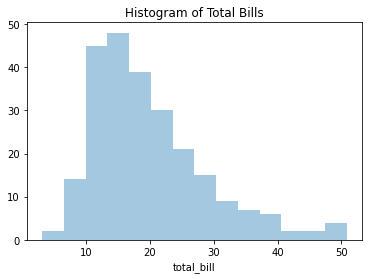

In [16]:
sns.distplot(tips_data['total_bill'], kde = False).set_title("Histogram of Total Bills")
plt.show()

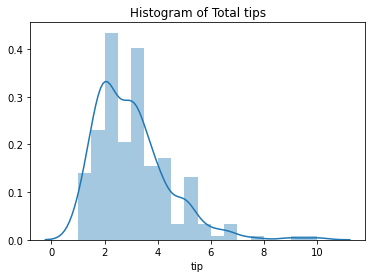

In [18]:
sns.distplot(tips_data['tip']).set_title("Histogram of Total tips")
plt.show()
#kde includes a density plot by default

Its possible to plot 2 graphs inside the same plt :)

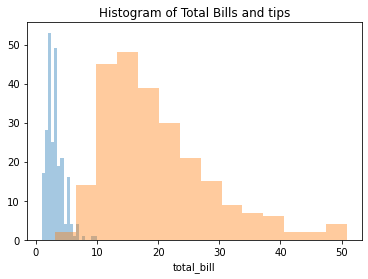

In [20]:
sns.distplot(tips_data['tip'], kde= False)
sns.distplot(tips_data['total_bill'], kde = False).set_title("Histogram of Total Bills and tips")
plt.show()

#### Lineplot

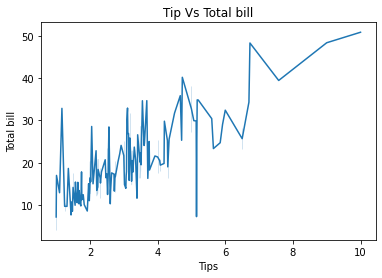

In [27]:
sns.lineplot(tips_data['tip'],tips_data['total_bill']).set_title("Tip Vs Total bill")
plt.xlabel('Tips'), plt.ylabel("Total bill")
plt.show()

#### Creating a boxplot

Boxplots do not show the shape of the distribution, but they can give us a better idea about the center and spread of the distribution as well as any potential outliers that may exist. Boxplots and Histograms often complement each other and help an analyst get more information about the data

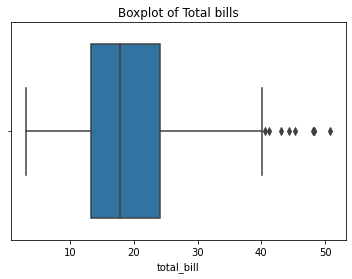

In [31]:
sns.boxplot(tips_data['total_bill']).set_title("Boxplot of Total bills")
plt.show()

It shows us that there are outliers above 40!

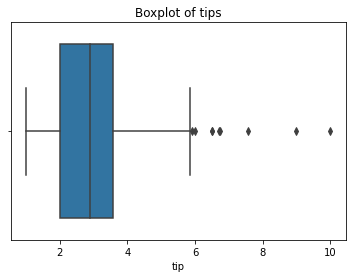

In [33]:
sns.boxplot(tips_data['tip']).set_title("Boxplot of tips")
plt.show()

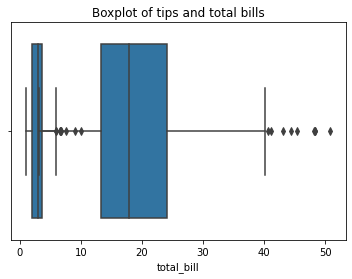

In [34]:
sns.boxplot(tips_data['tip'])
sns.boxplot(tips_data['total_bill']).set_title("Boxplot of tips and total bills")
plt.show()

Not good! same axis! In order to solve that...

#### Creating Histograms and Boxplots Plotted by Groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Using graphs, we can see if there is a difference between the tipping amounts of smokers vs. non-smokers, if tipping varies according to the time of the day, or we can explore other trends in the data as well.

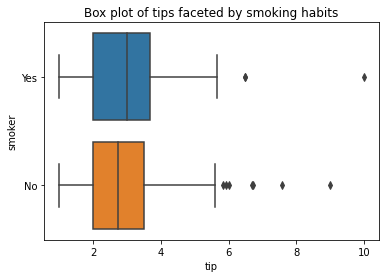

In [39]:
#faceted

sns.boxplot(y = tips_data['smoker'], x = tips_data['tip']).set_title("Box plot of tips faceted by smoking habits")
plt.show()

In [1]:
# outra alternativa para criar uma figura e plotar diferentes gráficos. Funciona bem com variáveis categóricas. Explorar mais e comparar com o método que o ninguém passou na aula
g = sns.FacetGrid(tips_data, col = "smoker") #creates a faceted grid
g = g.map(plt.hist, 'tip')

plt.show()

NameError: name 'sns' is not defined

- other way to do the above:

In [6]:
print(tips_data.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


Two ways of locating data inside the dataframe

In [45]:
#print(tips_data['sex'] == 'Female')
df= tips_data.loc[(tips_data.sex == "Female") & (tips_data.smoker == "Yes")]
print(df.head())

    total_bill   tip     sex smoker  day    time  size
67        3.07  1.00  Female    Yes  Sat  Dinner     1
72       26.86  3.14  Female    Yes  Sat  Dinner     2
73       25.28  5.00  Female    Yes  Sat  Dinner     2
92        5.75  1.00  Female    Yes  Fri  Dinner     2
93       16.32  4.30  Female    Yes  Fri  Dinner     2


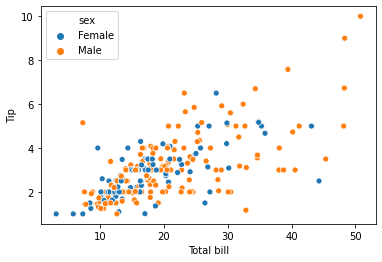

In [33]:
g = sns.scatterplot(x = tips_data['total_bill'], y = tips_data['tip'], hue = tips_data['sex'])
plt.xlabel ('Total bill'), plt.ylabel("Tip")
plt.show(g)

**Better way to plot faceted columns**

- map Vs map_dataframe

This method is suitable for plotting with functions that accept a **long-form DataFrame as a data keyword argument** and access the data in that DataFrame using string variable names.

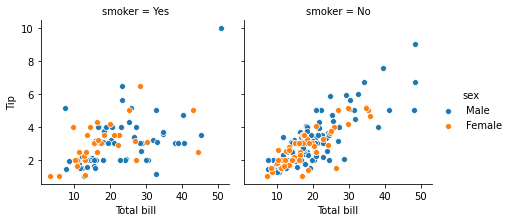

In [42]:
g = sns.FacetGrid(tips_data, col="smoker", hue="sex")
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.set_axis_labels("Total bill", "Tip")
g.add_legend()

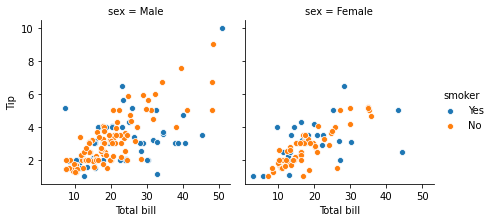

In [44]:
g = sns.FacetGrid(tips_data, col = "sex", hue = "smoker")
g = g.map_dataframe(sns.scatterplot, x = "total_bill", y = "tip")
g.set_axis_labels("Total bill", "Tip")
g.add_legend()

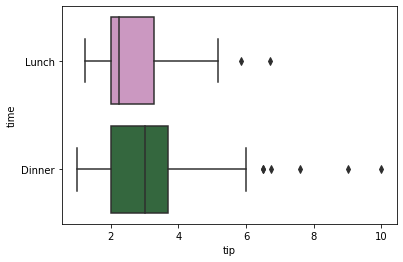

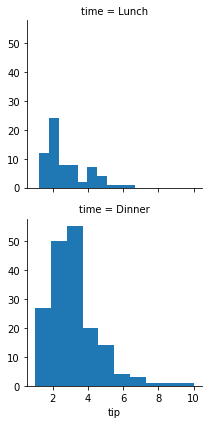

In [61]:
sns.boxplot(x = tips_data['tip'], y = tips_data['time'], palette='cubehelix_r')
g = sns.FacetGrid(tips_data, row = 'time')
g = g.map(plt.hist, 'tip')
 
    

In [5]:
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


- The barplot below shows that tips are more common at sundays

In [40]:
import scipy.stats as st

st.describe((tips_data['tip']))

DescribeResult(nobs=244, minmax=(1.0, 10.0), mean=2.99827868852459, variance=1.914454638062471, skewness=1.4564266884221506, kurtosis=3.5495519893455114)

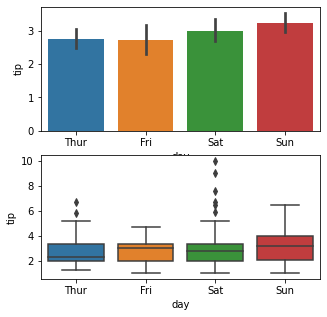

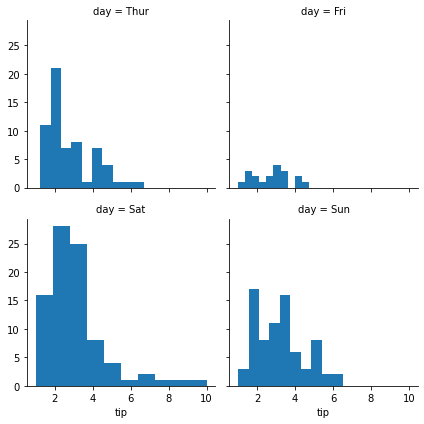

In [41]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(5,5),squeeze=True)
sns.barplot(x = tips_data['day'], y = tips_data['tip'], ax = ax1)
sns.boxplot(x = tips_data['day'], y = tips_data['tip'], ax = ax2)
g = sns.FacetGrid(tips_data, col = 'day', col_wrap=2)
g = g.map (plt.hist, 'tip')
plt.show()

In [18]:
tips_data.groupby('day').count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Thur,62,62,62,62,62,62
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76
